# Statistical And Machine Learning Individual Project

In this notebook you can find the application of 5 different machine algortithms. All of them with different approaches in order 
to cover as much as possible the material seen in class. 

# Datasets

In [1]:
#train dataset 
bank_train <- read.csv('./bank_mkt_train.csv')
head(bank_train)

client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
2,29,housemaid,single,high.school,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
3,39,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,49,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
5,32,self-employed,single,university.degree,no,yes,no,cellular,may,...,3,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
6,29,admin.,single,high.school,unknown,yes,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
7,51,self-employed,married,university.degree,unknown,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0


In [2]:
#test dataset 
bank_test <- read.csv('./bank_mkt_test.csv')
head(bank_test)

client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,33,technician,single,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
10,45,services,married,high.school,unknown,yes,no,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
11,33,technician,single,professional.course,no,yes,no,telephone,mar,tue,2,999,0,nonexistent,-1.8,93.369,-34.8,0.646,5008.7
12,38,blue-collar,married,basic.9y,unknown,no,no,telephone,jul,wed,3,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1
13,30,technician,single,university.degree,no,no,no,telephone,may,thu,5,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
17,33,blue-collar,married,basic.9y,no,yes,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1


# ML MODELS

## Decision tree

In [3]:
#divide between bank_train between train and test 
set.seed(4)
smp_size <- floor(0.75 * nrow(bank_train))

# set the seed to make your partition reproducible
set.seed(5)
train_ind2 <- sample(seq_len(nrow(bank_train)), size = smp_size)

train_tree <- bank_train[train_ind2, ]
test_tree <- bank_train[-train_ind2, ]

In [4]:
#package installation and running of several decision trees
if (!require("tree")) install.packages("tree")
library(tree) 
#train model with all variables
tree_bank <- tree(subscribe ~.-client_id,data=train_tree)
#train model with group 1 variables
tree_bank1 <- tree(subscribe ~ age + job + marital + education + default + housing + loan,data=train_tree )
#train model with group 2 variables
tree_bank2 <- tree(subscribe ~ contact + month + day_of_week,data=train_tree)
#train model with group 3 variables
tree_bank3 <- tree(subscribe ~ campaign + pdays + previous, poutcome, data=train_tree)
#train model with group 4 variables 
tree_bank4 <- tree(subscribe ~emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + nr.employed, data= train_tree)


Loading required package: tree
Warning message:
"package 'tree' was built under R version 3.6.2"

In [5]:
#Predict the different decision trees in the test dataset
tree_test <- predict(tree_bank,newdata=test_tree)
tree_test1 <- predict(tree_bank1,newdata=test_tree)
tree_test2 <- predict(tree_bank2,newdata=test_tree)
tree_test3 <- predict(tree_bank3,newdata=test_tree)
tree_test4 <- predict(tree_bank4,newdata=test_tree)

In [6]:
#Evaluation metrics 

#AUC all 

library(ROCR)
pred <- prediction(tree_test, test_tree$subscribe)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
#plot(perf)

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
auc

#AUC group 1
pred1 <- prediction(tree_test1, test_tree$subscribe)
perf1 <- performance(pred1, measure = "tpr", x.measure = "fpr")
#plot(perf)

auc1 <- performance(pred1, measure = "auc")
auc1 <- auc1@y.values[[1]]
auc1
#AUC group2
pred2 <- prediction(tree_test2, test_tree$subscribe)
perf2 <- performance(pred2, measure = "tpr", x.measure = "fpr")
#plot(perf)

auc2 <- performance(pred2, measure = "auc")
auc2 <- auc2@y.values[[1]]
auc2
#AUC group3
pred3 <- prediction(tree_test3, test_tree$subscribe)
perf1 <- performance(pred3, measure = "tpr", x.measure = "fpr")
#plot(perf)

auc3 <- performance(pred3, measure = "auc")
auc3 <- auc3@y.values[[1]]
auc3
#AUC group4
pred4 <- prediction(tree_test4, test_tree$subscribe)
perf4 <- performance(pred4, measure = "tpr", x.measure = "fpr")
#plot(perf)

auc4 <- performance(pred4, measure = "auc")
auc4 <- auc4@y.values[[1]]
auc4


Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.7715645

[1] 0.5526986

[1] 0.7304907

[1] 0.5838183

[1] 0.7557486

In [7]:
#Documents for Kaggle submission 
tree_sub <- predict(tree_bank4,newdata=bank_test)
write.csv(tree_sub ,"kk.csv", row.names = FALSE)

## Random Forest 

In [8]:
#dummies package to dummify some categorical variables
if (!require("dummies")) install.packages("dummies")
library(dummies)

Loading required package: dummies
dummies-1.5.6 provided by Decision Patterns



In [9]:
bank_train2 <- bank_train
#bank_train2$job <- NULL
bank_test2 <- bank_test
#bank_test2$job <- NULL

In [10]:
# Dummifying the categorical variables 
train_dummy<-dummy.data.frame(bank_train2,sep=".")
names(train_dummy)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

[1] "client_id"                     "age"                          
 [3] "job.admin."                    "job.blue-collar"              
 [5] "job.entrepreneur"              "job.housemaid"                
 [7] "job.management"                "job.retired"                  
 [9] "job.self-employed"             "job.services"                 
[11] "job.student"                   "job.technician"               
[13] "job.unemployed"                "job.unknown"                  
[15] "marital.divorced"              "marital.married"              
[17] "marital.single"                "marital.unknown"              
[19] "education.basic.4y"            "education.basic.6y"           
[21] "education.basic.9y"            "education.high.school"        
[23] "education.illiterate"          "education.professional.course"
[25] "education.university.degree"   "education.unknown"            
[27] "default.no"                    "default.unknown"              
[29] "housing.no"                    "housing.unknown"              
[31] "housing.yes"                   "loan.no"                      
[33] "loan.unknown"                  "loan.yes"                     
[35] "contact.cellular"              "contact.telephone"            
[37] "month.apr"                     "month.aug"                    
[39] "month.dec"                     "month.jul"                    
[41] "month.jun"                     "month.mar"                    
[43] "month.may"                     "month.nov"                    
[45] "month.oct"                     "month.sep"                    
[47] "day_of_week.fri"               "day_of_week.mon"              
[49] "day_of_week.thu"               "day_of_week.tue"              
[51] "day_of_week.wed"               "campaign"                     
[53] "pdays"                         "previous"                     
[55] "poutcome.failure"              "poutcome.nonexistent"         
[57] "poutcome.success"              "emp.var.rate"                 
[59] "cons.price.idx"                "cons.conf.idx"                
[61] "euribor3m"                     "nr.employed"                  
[63] "subscribe"

In [11]:
test_dummy <- dummy.data.frame(bank_test2,sep=".")
test_dummy <-cbind(education.illiterate = 0, test_dummy)
names(test_dummy)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

[1] "education.illiterate"          "client_id"                    
 [3] "age"                           "job.admin."                   
 [5] "job.blue-collar"               "job.entrepreneur"             
 [7] "job.housemaid"                 "job.management"               
 [9] "job.retired"                   "job.self-employed"            
[11] "job.services"                  "job.student"                  
[13] "job.technician"                "job.unemployed"               
[15] "job.unknown"                   "marital.divorced"             
[17] "marital.married"               "marital.single"               
[19] "marital.unknown"               "education.basic.4y"           
[21] "education.basic.6y"            "education.basic.9y"           
[23] "education.high.school"         "education.professional.course"
[25] "education.university.degree"   "education.unknown"            
[27] "default.no"                    "default.unknown"              
[29] "housing.no"                    "housing.unknown"              
[31] "housing.yes"                   "loan.no"                      
[33] "loan.unknown"                  "loan.yes"                     
[35] "contact.cellular"              "contact.telephone"            
[37] "month.apr"                     "month.aug"                    
[39] "month.dec"                     "month.jul"                    
[41] "month.jun"                     "month.mar"                    
[43] "month.may"                     "month.nov"                    
[45] "month.oct"                     "month.sep"                    
[47] "day_of_week.fri"               "day_of_week.mon"              
[49] "day_of_week.thu"               "day_of_week.tue"              
[51] "day_of_week.wed"               "campaign"                     
[53] "pdays"                         "previous"                     
[55] "poutcome.failure"              "poutcome.nonexistent"         
[57] "poutcome.success"              "emp.var.rate"                 
[59] "cons.price.idx"                "cons.conf.idx"                
[61] "euribor3m"                     "nr.employed"

In [12]:
set.seed(16)
smp_size <- floor(0.75 * nrow(bank_train2))

# set the seed to make your partition reproducible
set.seed(1)
train_ind2 <- sample(seq_len(nrow(bank_train2)), size = smp_size)

train2 <- train_dummy[train_ind2, ]
test2 <- train_dummy[-train_ind2, ]

In [13]:
names(train2) <- gsub("-", "_", names(train2))
names(test2) <- gsub("-","_",names(test2))
names(test_dummy)<-gsub("-","_",names(test_dummy))

In [14]:
if (!require("randomForest")) install.packages("randomForest")
library(randomForest)
set.seed(157)
bag.bank2 <- randomForest(subscribe~.-client_id,data=train2)
bag.bank2

Loading required package: randomForest
Warning message:
"package 'randomForest' was built under R version 3.6.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = subscribe ~ . - client_id, data = train2) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 20

          Mean of squared residuals: 0.08560585
                    % Var explained: 16.04

In [15]:
bag.predict2 <- predict(bag.bank2,newdata=test2)

[1] 0.7884483

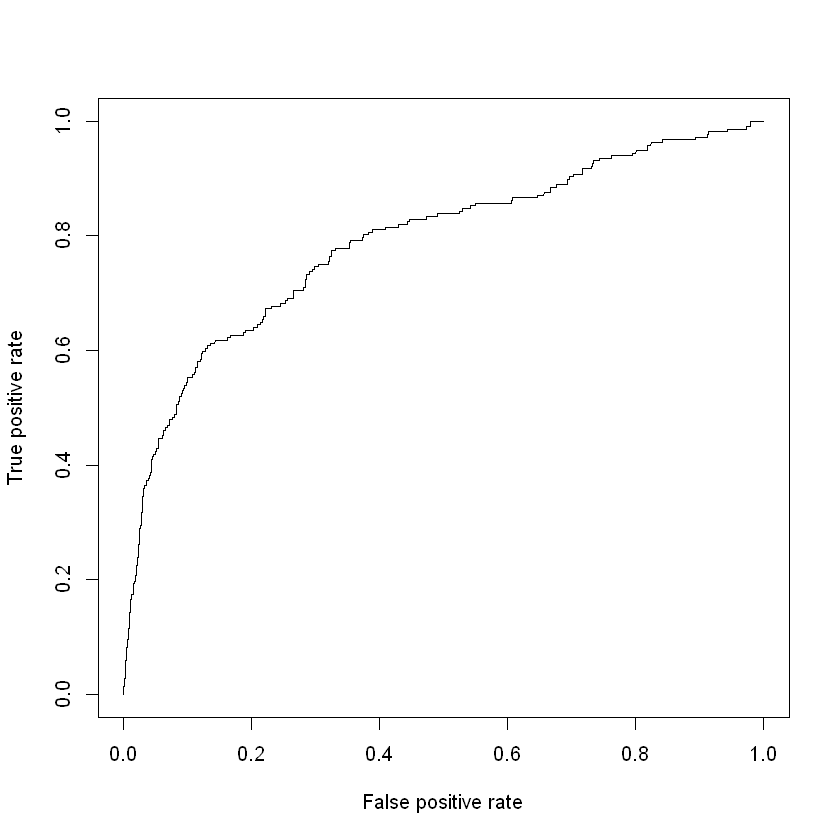

In [16]:
#AUC
library(ROCR)
pred_rf_dummy <- prediction(bag.predict2, test2$subscribe)
perf_rf_dummy <- performance(pred_rf_dummy, measure = "tpr", x.measure = "fpr")
plot(perf_rf_dummy)

auc <- performance(pred_rf_dummy, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [17]:
rf_sub_dummy <-  predict(bag.bank2,newdata=test_dummy)

In [18]:
#Kaggle submission random forest 
write.csv(rf_sub_dummy ,"rfkaggle.csv", row.names = FALSE)

## Logistic Regression

In [19]:
#dummify the variables
# Dummifying the categorical variables 
train_glm<-dummy.data.frame(bank_train,sep=".")
names(train_glm)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

[1] "client_id"                     "age"                          
 [3] "job.admin."                    "job.blue-collar"              
 [5] "job.entrepreneur"              "job.housemaid"                
 [7] "job.management"                "job.retired"                  
 [9] "job.self-employed"             "job.services"                 
[11] "job.student"                   "job.technician"               
[13] "job.unemployed"                "job.unknown"                  
[15] "marital.divorced"              "marital.married"              
[17] "marital.single"                "marital.unknown"              
[19] "education.basic.4y"            "education.basic.6y"           
[21] "education.basic.9y"            "education.high.school"        
[23] "education.illiterate"          "education.professional.course"
[25] "education.university.degree"   "education.unknown"            
[27] "default.no"                    "default.unknown"              
[29] "housing.no"                    "housing.unknown"              
[31] "housing.yes"                   "loan.no"                      
[33] "loan.unknown"                  "loan.yes"                     
[35] "contact.cellular"              "contact.telephone"            
[37] "month.apr"                     "month.aug"                    
[39] "month.dec"                     "month.jul"                    
[41] "month.jun"                     "month.mar"                    
[43] "month.may"                     "month.nov"                    
[45] "month.oct"                     "month.sep"                    
[47] "day_of_week.fri"               "day_of_week.mon"              
[49] "day_of_week.thu"               "day_of_week.tue"              
[51] "day_of_week.wed"               "campaign"                     
[53] "pdays"                         "previous"                     
[55] "poutcome.failure"              "poutcome.nonexistent"         
[57] "poutcome.success"              "emp.var.rate"                 
[59] "cons.price.idx"                "cons.conf.idx"                
[61] "euribor3m"                     "nr.employed"                  
[63] "subscribe"

In [20]:
test_glm<-dummy.data.frame(bank_test,sep=".")
names(test_glm)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

[1] "client_id"                     "age"                          
 [3] "job.admin."                    "job.blue-collar"              
 [5] "job.entrepreneur"              "job.housemaid"                
 [7] "job.management"                "job.retired"                  
 [9] "job.self-employed"             "job.services"                 
[11] "job.student"                   "job.technician"               
[13] "job.unemployed"                "job.unknown"                  
[15] "marital.divorced"              "marital.married"              
[17] "marital.single"                "marital.unknown"              
[19] "education.basic.4y"            "education.basic.6y"           
[21] "education.basic.9y"            "education.high.school"        
[23] "education.professional.course" "education.university.degree"  
[25] "education.unknown"             "default.no"                   
[27] "default.unknown"               "housing.no"                   
[29] "housing.unknown"               "housing.yes"                  
[31] "loan.no"                       "loan.unknown"                 
[33] "loan.yes"                      "contact.cellular"             
[35] "contact.telephone"             "month.apr"                    
[37] "month.aug"                     "month.dec"                    
[39] "month.jul"                     "month.jun"                    
[41] "month.mar"                     "month.may"                    
[43] "month.nov"                     "month.oct"                    
[45] "month.sep"                     "day_of_week.fri"              
[47] "day_of_week.mon"               "day_of_week.thu"              
[49] "day_of_week.tue"               "day_of_week.wed"              
[51] "campaign"                      "pdays"                        
[53] "previous"                      "poutcome.failure"             
[55] "poutcome.nonexistent"          "poutcome.success"             
[57] "emp.var.rate"                  "cons.price.idx"               
[59] "cons.conf.idx"                 "euribor3m"                    
[61] "nr.employed"

In [21]:
#train and test set to see accuracy and then predict
set.seed(21)
smp_size <- floor(0.75 * nrow(bank_train))

# set the seed to make your partition reproducible
set.seed(12)
train_ind_glm <- sample(seq_len(nrow(bank_train)), size = smp_size)

train_glm1 <- train_glm[train_ind_glm, ]
test_glm1 <- train_glm[-train_ind_glm, ]

In [22]:
names(train_glm1) <- gsub("-", "_", names(train_glm1))
names(test_glm1) <- gsub("-","_",names(test_glm1))
names(test_glm)<-gsub("-","_",names(test_glm))

Loading required package: pROC
Warning message:
"package 'pROC' was built under R version 3.6.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



[1] "nr.employed"
[1] "pdays"
[1] "month.may"
[1] "poutcome.nonexistent"
[1] "contact.telephone"
[1] "day_of_week.mon"
[1] "month.sep"
[1] "month.nov"
[1] "job.services"
[1] "month.mar"
[1] "cons.conf.idx"
[1] "month.aug"
[1] "poutcome.failure"
[1] "housing.unknown"
[1] "job.retired"
[1] "day_of_week.tue"
[1] "loan.unknown"
[1] "contact.cellular"
[1] "poutcome.success"
[1] "education.high.school"
[1] "job.student"
[1] "education.illiterate"
[1] "education.professional.course"
[1] "job.unemployed"
[1] "housing.no"
[1] "housing.yes"
[1] "marital.divorced"
[1] "default.no"
[1] "default.unknown"
[1] "education.basic.6y"
[1] "emp.var.rate"
[1] "cons.price.idx"
[1] "month.jun"
[1] "euribor3m"
[1] "month.dec"
[1] "job.self_employed"
[1] "month.oct"
[1] "day_of_week.fri"
[1] "job.unknown"
[1] "marital.married"
[1] "education.basic.9y"
[1] "job.blue_collar"
[1] "job.management"
[1] "job.entrepreneur"
[1] "education.unknown"
[1] "campaign"
[1] "loan.no"
[1] "loan.yes"
[1] "age"
[1] "month.apr"
[

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed" "pdays"       "month.may"  


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent"


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent" "contact.telephone"   


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
[7] "month.sep"           


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
[7] "month.sep"            "month.nov"           


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "nr.employed"          "pdays"                "month.may"           
[4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
[7] "month.sep"            "month.nov"            "job.services"        


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"           


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"       


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"    


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"     


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"      "job.retired"         


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"      "job.retired"         
[16] "day_of_week.tue"     


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"      "job.retired"         
[16] "day_of_week.tue"      "loan.unknown"        


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"      "job.retired"         
[16] "day_of_week.tue"      "loan.unknown"         "contact.cellular"    


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"          "pdays"                "month.may"           
 [4] "poutcome.nonexistent" "contact.telephone"    "day_of_week.mon"     
 [7] "month.sep"            "month.nov"            "job.services"        
[10] "month.mar"            "cons.conf.idx"        "month.aug"           
[13] "poutcome.failure"     "housing.unknown"      "job.retired"         
[16] "day_of_week.tue"      "loan.unknown"         "contact.cellular"    
[19] "poutcome.success"    


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"           "pdays"                 "month.may"            
 [4] "poutcome.nonexistent"  "contact.telephone"     "day_of_week.mon"      
 [7] "month.sep"             "month.nov"             "job.services"         
[10] "month.mar"             "cons.conf.idx"         "month.aug"            
[13] "poutcome.failure"      "housing.unknown"       "job.retired"          
[16] "day_of_week.tue"       "loan.unknown"          "contact.cellular"     
[19] "poutcome.success"      "education.high.school"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"           "pdays"                 "month.may"            
 [4] "poutcome.nonexistent"  "contact.telephone"     "day_of_week.mon"      
 [7] "month.sep"             "month.nov"             "job.services"         
[10] "month.mar"             "cons.conf.idx"         "month.aug"            
[13] "poutcome.failure"      "housing.unknown"       "job.retired"          
[16] "day_of_week.tue"       "loan.unknown"          "contact.cellular"     
[19] "poutcome.success"      "education.high.school" "job.student"          


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"           "pdays"                 "month.may"            
 [4] "poutcome.nonexistent"  "contact.telephone"     "day_of_week.mon"      
 [7] "month.sep"             "month.nov"             "job.services"         
[10] "month.mar"             "cons.conf.idx"         "month.aug"            
[13] "poutcome.failure"      "housing.unknown"       "job.retired"          
[16] "day_of_week.tue"       "loan.unknown"          "contact.cellular"     
[19] "poutcome.success"      "education.high.school" "job.student"          
[22] "education.illiterate" 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                   


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"             


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


 [1] "nr.employed"                   "pdays"                        
 [3] "month.may"                     "poutcome.nonexistent"         
 [5] "contact.telephone"             "day_of_week.mon"              
 [7] "month.sep"                     "month.nov"                    
 [9] "job.services"                  "month.mar"                    
[11] "cons.conf.idx"                 "month.aug"                    
[13] "poutcome.failure"              "housing.unknown"              
[15] "job.retired"                   "day_of_week.tue"              
[17] "loan.unknown"                  "contact.cellular"             
[19] "poutcome.success"              "education.high.school"        
[21] "job.student"                   "education.illiterate"         
[23] "education.professional.course" "job.unemployed"               
[25] "housing.no"                    "housing.yes"                  
[27] "marital.divorced"              "default.no"                   
[29] "default.unknown"            

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


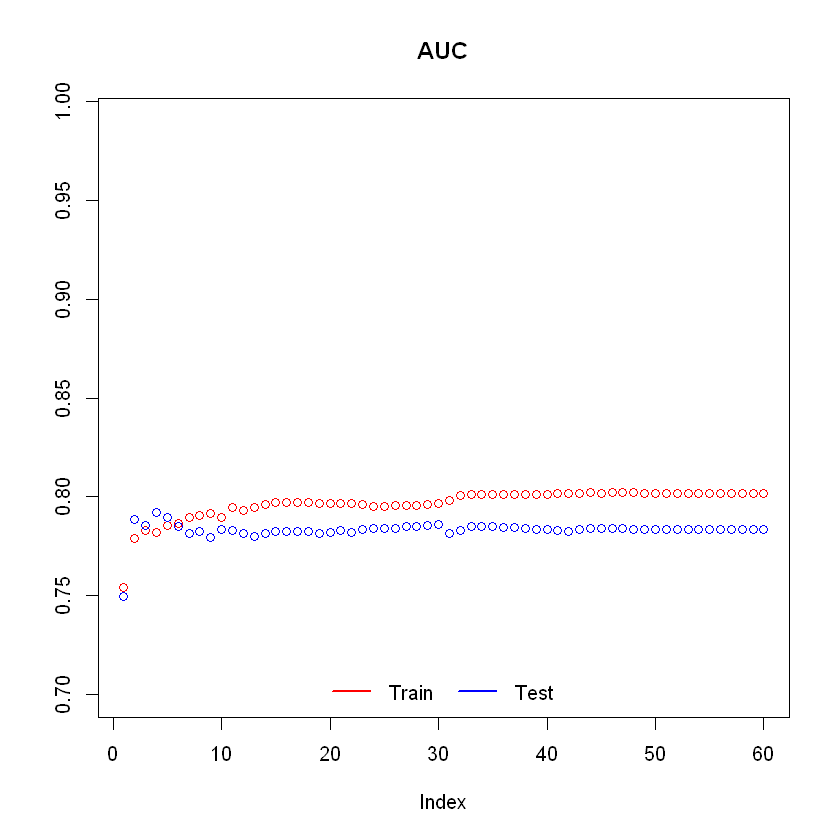

In [23]:
#installation pROC package to compute AUC
if (!require("pROC")) install.packages("pROC")
library(pROC)
# All variables:
variables = colnames(train_glm1)[2:(ncol(train_glm1)-1)]
variablesorder = c()

# Construct a logistic regression model with no variables
model_glm = glm(subscribe ~ 1,data=train_glm1,family=binomial(link='logit'))

# Construct a formula with all the variables
formula=formula(paste("subscribe","~",paste(variables,collapse="+")))

#Loop over the steps
for(i in c(1:length(variables))){
  #calculate AIC of each model
  info = add1(model_glm,scope=formula,data=train_glm1)
  #get variable with highest AIC
  orderedvariables = rownames(info[order(info$AIC),])
  v = orderedvariables[orderedvariables!="<none>"][1]
  #add variable to formula
  variablesorder = append(variablesorder,v)
  formulanew = formula(paste("subscribe","~",paste(variablesorder,collapse = "+")))
  model_glm = glm(formulanew,data=train_glm1,family=binomial(link='logit'))
  print(v)
}

auctrain = rep(0,length(variablesorder)-1)
auctest = rep(0,length(variablesorder)-1)

for(i in c(1:(length(variablesorder)-1))){
  vars = variablesorder[0:i+1]
  print(vars)
  formula<-paste("subscribe","~",paste(vars,collapse="+"))
  model_glm<-glm(formula,data=train_glm1,family=binomial(link='logit'))
  predicttrain<-predict(model_glm,newdata=train_glm1,type="response")
  predicttest<-predict(model_glm,newdata=test_glm1,type="response")
  auctrain[i] = auc(train_glm1$subscribe,predicttrain)
  auctest[i] = auc(test_glm1$subscribe,predicttest)
} 

#Plot AUC Test and Train
plot(auctrain, main="AUC", col="red",ylim= c(0.7, 0.99), ylab = " ")
lines(auctest,col="blue", type="p")

legend("bottom", legend=c("Train","Test"), ncol=2,bty="n",
       col=c("red", "blue"), lwd = 2)

In [33]:
#Select the model with optimal number of variables which will be 30 in this case 
finalvariables = variablesorder[c(0:30)]
formula<-paste("subscribe","~",paste(finalvariables,collapse="+"))
model_glm<-glm(formula,data=train_glm1,family=binomial(link='logit'))
predicttrain<-predict(model_glm,newdata=train_glm1,type="response")
predicttest<-predict(model_glm,newdata=test_glm1,type="response")
#Calculating the auctrain and auctest with our selected variables
auctrain <- auc(train_glm1$subscribe,predicttrain)
auctest <- auc(test_glm1$subscribe,predicttest)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Setting levels: control = 0, case = 1
Setting direction: controls < cases
Setting levels: control = 0, case = 1
Setting direction: controls < cases


In [36]:
print(auctest)

Area under the curve: 0.7856


In [41]:
#add columns of zeros for column education.illiterate
test_glm$education.illiterate <- 0

In [42]:
#predict in the submission dataset for kaggle
glm.submission <- predict(model_glm,newdata=test_glm, type = "response")
glm.submission <- data.frame(glm.submission)
write.csv(glm.submission ,"glmkaggle.csv", row.names = FALSE)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

## Support Vector Machine 

In [ ]:
#train dummy 
train_svm<-dummy.data.frame(bank_train,sep=".")
names(train_svm)

In [ ]:
#test_dummy
test_svm <- dummy.data.frame(bank_test,sep=".")
names(test_svm)

In [ ]:
#thje first column is client_id and the last one is the target(subscribe)
dim(train_svm)

In [ ]:
#feature selection by doing a correlation matrix without primary and target vaiable
correlationMatrix <- cor(train_svm[,2:62])
print(correlationMatrix)

In [ ]:
correlationMatrix[34]

In [ ]:
#we establish a threshold of 0.5 of correlation
cor_relevant <- findCorrelation(correlationMatrix, cutoff=0.5)

In [ ]:
print(cor_relevant)


In [ ]:
colnames(train_svm[c(cor_relevant)])

In [ ]:
#training scheme 
control <- trainControl(method="cv", number=5)

In [ ]:
#train and test set to see accuracy and then predict
set.seed(213)
smp_size <- floor(0.75 * nrow(bank_train))

# set the seed to make your partition reproducible
set.seed(12)
train_ind_svm <- sample(seq_len(nrow(bank_train)), size = smp_size)

train_svm1 <- train_svm[train_ind_svm, ]
test_svm1<- train_svm[-train_ind_svm, ]

In [ ]:
if (!require("kernlab")) install.packages("kernlab")
library(kernlab)
model_svm <- train(subscribe~cons.conf.idx+poutcome.success+euribor3m+emp.var.rate+loan.yes+poutcome.failure+pdays+campaign+education.unknown + marital.married +housing.unknown+housing.yes+loan.no, data=train_svm, method="svmRadial", preProcess="scale", trControl=control)

In [ ]:
model_test_svm <- predict(model_svm,test_svm1)

In [ ]:
#see the performance using AUC
library(ROCR)
pred <- prediction(model_test_svm, test_svm1$subscribe)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf)

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
#predict svm submission
svm.sub <- predict(model_svm,newdata=test_svm, type = "raw")
svm.sub <- data.frame(svm.sub)
write.csv(glm.submission ,"svmkaggle.csv", row.names = FALSE)

## LDA

In [ ]:
# Dummifying the categorical variables 
train_lda<-dummy.data.frame(bank_train,sep=".")
names(train_lda)

In [ ]:
# PCA
if (!require("dplyr")) install.packages("dplyr")
library(dplyr)
pca_trainset = train_lda %>% select( -subscribe, -client_id, -education.illiterate)
pca_testset = subs_dummy 
pca = prcomp( pca_trainset, scale = T )

# variance
pr_var = ( pca$sdev )^2 

# % of variance
prop_varex = pr_var / sum( pr_var )

# Plot
plot( prop_varex, xlab = "Principal Component", 
                  ylab = "Proportion of Variance Explained", type = "b" )

#According to this graph we should choose up to the first 37 components

#According to this graph we should choose up to the first 37 components

In [ ]:
# Scree Plot
#With respect to the cumulative variance most of it is explained by the 46 first components
plot( cumsum( prop_varex ), xlab = "Principal Component", 
                            ylab = "Cumulative Proportion of Variance Explained", type = "b" )

In [ ]:
# Creating a new dataset
train = data.frame( class = train_lda$subscribe, pca$x )
t = as.data.frame( predict( pca, newdata = pca_testset ) )

trainset_pca = train[, 1:46]
testset_pca =  t[, 1:45]

In [ ]:
head(trainset_pca)

In [ ]:
#LDA model 
#divide trainset_pca into train and validation
set.seed(143)
smp_size <- floor(0.75 * nrow(trainset_pca))

# set the seed to make your partition reproducible
set.seed(123)
pca_ind <- sample(seq_len(nrow(trainset_pca)), size = smp_size)

train_pca1 <- trainset_pca[pca_ind, ]
validation_pca1 <- trainset_pca[-pca_ind, ]

In [ ]:
if (!require("MASS")) install.packages("MASS")
library(MASS)
lda.fit <- lda(class~.,data=train_pca1)

In [ ]:
#predict in validation set 
lda.pred<- predict(lda.fit,validation_pca1,type="raw")
names(lda.pred)

In [ ]:
#see the performance using AUC
library(ROCR)
pred <- prediction(lda.pred$x, validation_pca1$class)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf)

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
#now predict in submission dataset
lda.sub <- predict(lda.fit,testset_pca,type="raw")
lda.sub <- data.frame(lda.sub)
write.csv(lda.sub ,"ldakaggle.csv", row.names = FALSE)

In [ ]:
#https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32